# Exercise 8 - Algebra

### Tone Alsvik Finstad

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

### 1. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
#Generate a dataset simulating 3 features
N=1000
x_1=np.random.normal(loc=0, scale=1, size=N)
x_2=x_1+np.random.normal(loc=0, scale=3, size=N)
x_3=2*x_1+x_2

#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
df=pd.DataFrame(zip(x_1, x_1, x_3))
A = np.array(df.cov())
print("A:\n", A, '\n')

l, V = la.eig(A)
# the eigenvalues
print("l:\n", l, '\n')
print("real(l):\n", np.real_if_close(l), '\n')
# V is the matrix of the eigenvectors
print("V:\n", V, '\n')
print("V^T:\n", V.transpose(), '\n')

A:
 [[ 1.001421    1.001421    3.16807105]
 [ 1.001421    1.001421    3.16807105]
 [ 3.16807105  3.16807105 18.31757199]] 

l:
 [1.94669761e+01+0.j 2.59698347e-16+0.j 8.53437849e-01+0.j] 

real(l):
 [1.94669761e+01 2.59698347e-16 8.53437849e-01] 

V:
 [[-1.75714223e-01 -7.07106781e-01 -6.84926647e-01]
 [-1.75714223e-01  7.07106781e-01 -6.84926647e-01]
 [-9.68632554e-01 -3.44231464e-17  2.48497437e-01]] 

V^T:
 [[-1.75714223e-01 -1.75714223e-01 -9.68632554e-01]
 [-7.07106781e-01  7.07106781e-01 -3.44231464e-17]
 [-6.84926647e-01 -6.84926647e-01  2.48497437e-01]] 



In [3]:
#Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
A = np.array(df.cov()) #+ 1.j*np.random.randn(m, n) # it also work with complex numbers
print("A:\n", A, '\n')

# perform the SVD
U, s, Vt = la.svd(A)
print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

A:
 [[ 1.001421    1.001421    3.16807105]
 [ 1.001421    1.001421    3.16807105]
 [ 3.16807105  3.16807105 18.31757199]] 

shapes: U = (3, 3) S: (3,) V^T: (3, 3) 

Spectrum:
 [1.94669761e+01 8.53437849e-01 4.70528050e-16] 

U:
 [[-1.75714223e-01 -6.84926647e-01 -7.07106781e-01]
 [-1.75714223e-01 -6.84926647e-01  7.07106781e-01]
 [-9.68632554e-01  2.48497437e-01  3.83816217e-17]] 

V^T:
 [[-1.75714223e-01 -1.75714223e-01 -9.68632554e-01]
 [-6.84926647e-01 -6.84926647e-01  2.48497437e-01]
 [ 7.07106781e-01 -7.07106781e-01 -9.63321900e-17]] 



In [4]:
#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? 
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained



#l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (100*Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (100*Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (100*Lambda[2, 2]/Lambda.trace()))

Lambda:
 [[1.94669761e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 2.59698347e-16+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 8.53437849e-01+0.j]] 

Trace(Lambda):
 (20.32041399818808+0j) 

By selecting the component 0, we retain 95.80% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 4.20% of the total variability


C:\Users\tonea\Anaconda32\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\tonea\Anaconda32\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
C:\Users\tonea\Anaconda32\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


It makes sense as one of the datasets are completely random (high variability), one uses the first and adds a random component (lower variability), while the third is only generated using the two others (zero variability). 

In [5]:
#See that we can remove the third element, as the others combined have over 99%. 
df_2=pd.DataFrame(zip(x_1, x_2))

In [6]:
#Redefine the data according to the new basis from the PCA
xp=np.dot(Vt , df.to_numpy().T)
print(xp)

[[ 3.49321960e+00 -2.45746112e-01  2.32701961e+00 ... -1.57161537e+00
   4.25326608e-01 -3.12243895e+00]
 [ 7.59141452e-01 -4.48026781e-01 -1.02186186e+00 ... -1.73283478e+00
   5.88675229e-01 -1.48117911e+00]
 [-9.13463834e-16  3.76372368e-16  5.74663897e-16 ...  1.44914515e-15
  -4.74004810e-16  1.52045743e-15]]


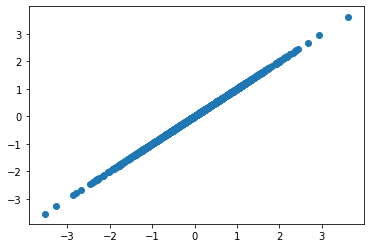

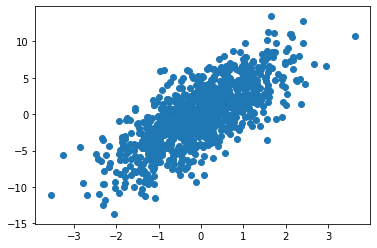

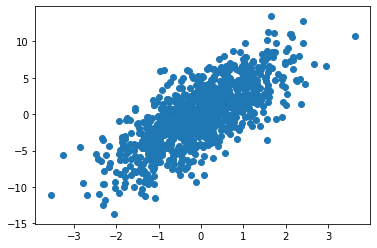

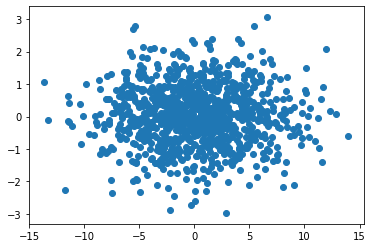

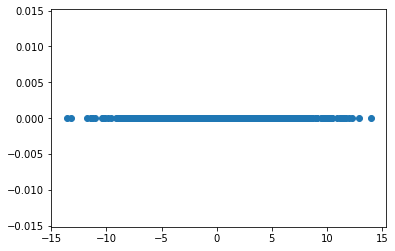

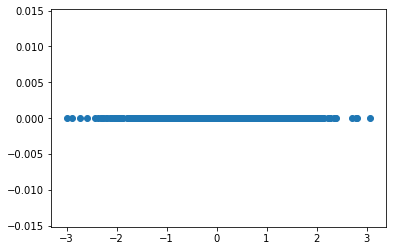

In [7]:
#Plot the data, in both the original and the new basis. 
#The figure should have 2 rows (the original and the new basis) and 3 columns 
#(the  [𝑥0,𝑥1] ,  [𝑥0,𝑥2]  and  [𝑥1,𝑥2]  projections) of scatter plots.
plt.scatter(df.to_numpy().T[0],df.to_numpy().T[1])
plt.show()
plt.scatter(df.to_numpy().T[0],df.to_numpy().T[2])
plt.show()
plt.scatter(df.to_numpy().T[1],df.to_numpy().T[2])
plt.show()
plt.scatter(xp[0],xp[1])
plt.show()
plt.scatter(xp[0],xp[2])
plt.show()
plt.scatter(xp[1],xp[2])
plt.show()

### 2. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [8]:
#Generate a dataset simulating 3 features
N=1000
x_1=np.random.normal(loc=0, scale=1, size=N)
x_2=x_1+np.random.normal(loc=0, scale=3, size=N)
x_3=2*x_1+x_2

for i in range(10):
    x_1+=np.random.normal(loc=0, scale=1/20, size=N)
    x_2+=np.random.normal(loc=0, scale=3/20, size=N)
    x_3+=np.random.normal(loc=0, scale=1/20, size=N)

#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
df_noise=pd.DataFrame(zip(x_1, x_1, x_3))

A = np.array(df_noise.cov())
print("A:\n", A, '\n')

l, V = la.eig(A)
# the eigenvalues
print("l:\n", l, '\n')
print("real(l):\n", np.real_if_close(l), '\n')
# V is the matrix of the eigenvectors
print("V:\n", V, '\n')
print("V^T:\n", V.transpose(), '\n')


A:
 [[ 0.97146368  0.97146368  2.678575  ]
 [ 0.97146368  0.97146368  2.678575  ]
 [ 2.678575    2.678575   16.73055474]] 

l:
 [1.76444489e+01+0.j 1.25616252e-15+0.j 1.02903325e+00+0.j] 

real(l):
 [1.76444489e+01 1.25616252e-15 1.02903325e+00] 

V:
 [[-1.65835436e-01 -7.07106781e-01 -6.87385342e-01]
 [-1.65835436e-01  7.07106781e-01 -6.87385342e-01]
 [-9.72109673e-01  5.32778171e-17  2.34526723e-01]] 

V^T:
 [[-1.65835436e-01 -1.65835436e-01 -9.72109673e-01]
 [-7.07106781e-01  7.07106781e-01  5.32778171e-17]
 [-6.87385342e-01 -6.87385342e-01  2.34526723e-01]] 



In [9]:
#Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
A = np.array(df_noise.cov()) #+ 1.j*np.random.randn(m, n) # it also work with complex numbers
print("A:\n", A, '\n')

# perform the SVD
U, s, Vt = la.svd(A)
print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

A:
 [[ 0.97146368  0.97146368  2.678575  ]
 [ 0.97146368  0.97146368  2.678575  ]
 [ 2.678575    2.678575   16.73055474]] 

shapes: U = (3, 3) S: (3,) V^T: (3, 3) 

Spectrum:
 [1.76444489e+01 1.02903325e+00 1.07343250e-16] 

U:
 [[-1.65835436e-01 -6.87385342e-01 -7.07106781e-01]
 [-1.65835436e-01 -6.87385342e-01  7.07106781e-01]
 [-9.72109673e-01  2.34526723e-01 -1.10661904e-17]] 

V^T:
 [[-1.65835436e-01 -1.65835436e-01 -9.72109673e-01]
 [-6.87385342e-01 -6.87385342e-01  2.34526723e-01]
 [-7.07106781e-01  7.07106781e-01 -2.40102477e-17]] 



In [10]:
#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? 
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained



#l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (100*Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (100*Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (100*Lambda[2, 2]/Lambda.trace()))

Lambda:
 [[1.76444489e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 1.25616252e-15+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 1.02903325e+00+0.j]] 

Trace(Lambda):
 (18.673482110861006+0j) 

By selecting the component 0, we retain 94.49% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 5.51% of the total variability


C:\Users\tonea\Anaconda32\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\tonea\Anaconda32\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
C:\Users\tonea\Anaconda32\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [11]:
#Redefine the data according to the new basis from the PCA
xp=np.dot(Vt , df_noise.to_numpy().T)
print(xp)

[[-3.09807681e-01  5.68132084e+00 -5.18963413e+00 ...  5.12389777e+00
   5.28104216e+00  3.23699763e+00]
 [ 2.81807656e-01  1.41667632e+00  1.38032782e-01 ...  1.77946901e+00
  -3.02983802e+00 -6.28583683e-01]
 [ 6.05709722e-17  1.01280646e-15 -4.54973320e-16 ...  9.97752968e-16
  -4.14787698e-16  1.34604182e-16]]


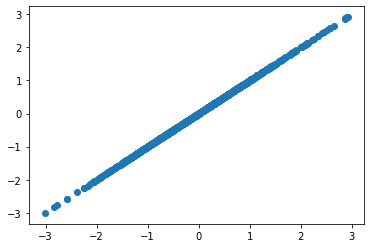

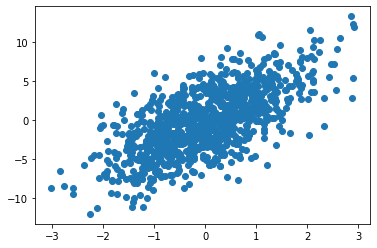

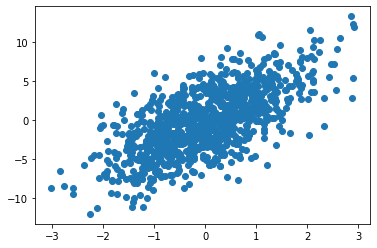

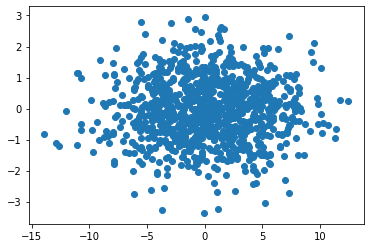

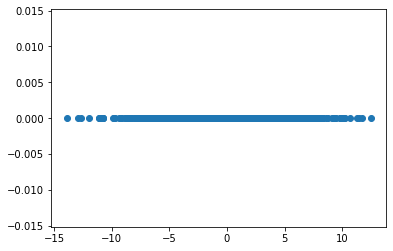

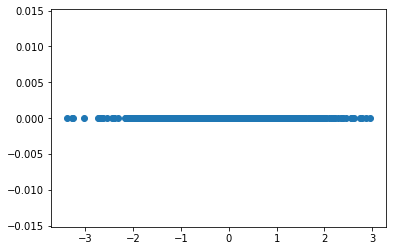

In [12]:
#Plot the data, in both the original and the new basis. 
#The figure should have 2 rows (the original and the new basis) and 3 columns 
#(the  [𝑥0,𝑥1] ,  [𝑥0,𝑥2]  and  [𝑥1,𝑥2]  projections) of scatter plots.
plt.scatter(df_noise.to_numpy().T[0],df_noise.to_numpy().T[1])
plt.show()
plt.scatter(df_noise.to_numpy().T[0],df_noise.to_numpy().T[2])
plt.show()
plt.scatter(df_noise.to_numpy().T[1],df_noise.to_numpy().T[2])
plt.show()
plt.scatter(xp[0],xp[1])
plt.show()
plt.scatter(xp[0],xp[2])
plt.show()
plt.scatter(xp[1],xp[2])
plt.show()

Get similar plots with the noise as without.